## 파이썬을이용한통계학습(HAFX0020)
### 10주차_추가 자료
### Logistic Regression: classification
- Linear Regression 연장선상의 Classification 타입 Supervised Learning 모델
- scikit-learn 라이브러리를 이용한 Logistic Regression

In [3]:
# 패키지 imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf 

# notebook에 직접 그래프를 plot  
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
crawl_data = pd.read_csv('/content/drive/MyDrive/빅데이터응용/팀 프로젝트/크롤링/crawl_data_delete_2.csv')
crawl_data

,title,link,mountain,upload_to,운해 여부,위치
0,오늘 일출과 운해,https://cafe.naver.com/windstopper/ArticleRead...,[‘심항산’],2023.05.08.,1.0,충주
1,"노동절 새벽, 월출산의 운해일출",https://cafe.naver.com/windstopper/ArticleRead...,['월출산'],2023.05.01.,1.0,영암
2,백운대 일출산행(feat. 운해사냥),https://cafe.naver.com/windstopper/ArticleRead...,[‘북한산'],2023.05.01.,1.0,서울
3,백운대 운해사냥성공(thanks to또민아빠님),https://cafe.naver.com/windstopper/ArticleRead...,[‘북한산'],2023.04.30.,1.0,서울
4,운해 실패,https://cafe.naver.com/windstopper/ArticleRead...,[‘삼악산'],2023.04.30.,0.0,춘천
...,...,...,...,...,...,...
857,여수 영취산 일출 새벽 산행,https://cafe.naver.com/windstopper/ArticleRead...,['영취산'],2021.07.25.,0.0,여수
858,말잇못 노고단 일출,https://cafe.naver.com/windstopper/ArticleRead...,[‘노고단'],2021.07.23.,0.0,구례
859,양구봉화산일출,https://cafe.naver.com/windstopper/ArticleRead...,['양구봉화산'],2021.07.23.,1.0,양구
860,덕유산 일출 산행 대신 팔공산 톱날능선,https://cafe.naver.com/windstopper/ArticleRead...,['덕유산'],2021.07.21.,0.0,무주


In [6]:
unique_values = crawl_data['위치'].unique()  # 고유한 값들을 가져옵니다

print(f"열 '{'위치'}'에는 총 {len(unique_values)} 종류의 값이 있습니다.")

for value in unique_values:
    count = crawl_data[crawl_data['위치'] == value].shape[0]  # 해당 값에 해당하는 행 수를 계산합니다.
    print(f"'{value}': {count}개의 행")

열 '위치'에는 총 96 종류의 값이 있습니다.
'충주': 19개의 행
'영암': 26개의 행
'서울': 143개의 행
'춘천': 8개의 행
'단양': 17개의 행
'인천': 6개의 행
'남양주': 26개의 행
'함양': 104개의 행
'지린': 1개의 행
'무주': 17개의 행
'괴산': 3개의 행
'합천': 47개의 행
'태백': 12개의 행
'대구': 16개의 행
'하남': 7개의 행
'양주': 14개의 행
'구례': 22개의 행
'청송': 1개의 행
'제천': 23개의 행
'정읍': 1개의 행
'영동': 4개의 행
'인제': 44개의 행
'임실': 2개의 행
'포천': 7개의 행
'파주': 19개의 행
'수원': 3개의 행
'제주': 12개의 행
'구미': 8개의 행
'울진': 3개의 행
'홍성': 4개의 행
'의정부': 1개의 행
'전주': 4개의 행
'연천': 4개의 행
'홍천': 7개의 행
'울산': 1개의 행
'장흥': 1개의 행
'양평': 3개의 행
'해남': 6개의 행
'의왕': 6개의 행
'아산': 3개의 행
'완주': 7개의 행
'평창': 7개의 행
'계룡': 8개의 행
'영양': 1개의 행
'안양': 1개의 행
'창원': 8개의 행
'김해': 1개의 행
'고성': 1개의 행
'금산': 3개의 행
'보성': 4개의 행
'원주': 6개의 행
'담양': 3개의 행
'부안': 1개의 행
'강화': 5개의 행
'광주': 22개의 행
'헤님': 1개의 행
'강진': 3개의 행
'여수': 2개의 행
'거제': 1개의 행
'성남': 3개의 행
'양산': 1개의 행
'울주': 22개의 행
'장성': 1개의 행
'광명': 2개의 행
'부산': 16개의 행
'과천': 12개의 행
'가평': 4개의 행
'안성': 1개의 행
'남원': 4개의 행
'목포': 2개의 행
'대전': 3개의 행
'시흥': 1개의 행
'경주': 3개의 행
'평택': 1개의 행
'정선': 5개의 행
'거창': 2개의 행
'용인': 2개의 행
'진안': 2개의 행
'상주': 6개의 행
'

In [7]:
unique_values = crawl_data['운해 여부'].unique()  # 고유한 값들을 가져옵니다

print(f"열 '{'운해 여부'}'에는 총 {len(unique_values)} 종류의 값이 있습니다.")

for value in unique_values:
    count = crawl_data[crawl_data['운해 여부'] == value].shape[0]  # 해당 값에 해당하는 행 수를 계산합니다.
    print(f"'{value}': {count}개의 행")

열 '운해 여부'에는 총 2 종류의 값이 있습니다.
'1.0': 289개의 행
'0.0': 573개의 행


In [9]:
new_df = crawl_data[crawl_data['위치'].map(crawl_data['위치'].value_counts()) > 18]
new_df


,title,link,mountain,upload_to,운해 여부,위치
0,오늘 일출과 운해,https://cafe.naver.com/windstopper/ArticleRead...,[‘심항산’],2023.05.08.,1.0,충주
1,"노동절 새벽, 월출산의 운해일출",https://cafe.naver.com/windstopper/ArticleRead...,['월출산'],2023.05.01.,1.0,영암
2,백운대 일출산행(feat. 운해사냥),https://cafe.naver.com/windstopper/ArticleRead...,[‘북한산'],2023.05.01.,1.0,서울
3,백운대 운해사냥성공(thanks to또민아빠님),https://cafe.naver.com/windstopper/ArticleRead...,[‘북한산'],2023.04.30.,1.0,서울
7,지금 이 순간(운해 보러 온 동백이),https://cafe.naver.com/windstopper/ArticleRead...,[‘충주남산’],2022. 10. 15.,1.0,충주
...,...,...,...,...,...,...
851,신불산 일출!,https://cafe.naver.com/windstopper/ArticleRead...,['신불산'],2021.08.02.,1.0,울주
854,신선대(성인대) 일출 그리고 울산바위,https://cafe.naver.com/windstopper/ArticleRead...,[‘신선대'],2021.07.29.,0.0,인제
856,월출산 일출 시도했다가...,https://cafe.naver.com/windstopper/ArticleRead...,['월출산'],2021.07.25.,0.0,영암
858,말잇못 노고단 일출,https://cafe.naver.com/windstopper/ArticleRead...,[‘노고단'],2021.07.23.,0.0,구례


In [11]:
unique_values1 = new_df['위치'].unique()  # 고유한 값들을 가져옵니다
allCount = 0

print(f"열 '{'위치'}'에는 총 {len(unique_values1)} 종류의 값이 있습니다.")

for value in unique_values1:
    count = new_df[new_df['위치'] == value].shape[0]  # 해당 값에 해당하는 행 수를 계산합니다.
    allCount = allCount + count
    print(f"'{value}': {count}개의 행")
  

print(allCount)

열 '위치'에는 총 12 종류의 값이 있습니다.
'충주': 19개의 행
'영암': 26개의 행
'서울': 143개의 행
'남양주': 26개의 행
'함양': 104개의 행
'합천': 47개의 행
'구례': 22개의 행
'제천': 23개의 행
'인제': 44개의 행
'파주': 19개의 행
'광주': 22개의 행
'울주': 22개의 행
517


In [ ]:
seoul_data = crawl_data[crawl_data['위치'] == '서울']
seoul_data


,title,link,mountain,upload_to,운해 여부,위치
2,백운대 일출산행(feat. 운해사냥),https://cafe.naver.com/windstopper/ArticleRead...,[‘북한산'],2023-05-01,1.0,서울
3,백운대 운해사냥성공(thanks to또민아빠님),https://cafe.naver.com/windstopper/ArticleRead...,[‘북한산'],2023-04-30,1.0,서울
8,현직 백운대 운해 관람중..,https://cafe.naver.com/windstopper/ArticleRead...,[‘북한산'],2023-04-19,1.0,서울
12,북한산에서의 일출+운해,https://cafe.naver.com/windstopper/ArticleRead...,['북한산'],2023-03-17,1.0,서울
13,백운대 일출 영상과 흑백의 운해,https://cafe.naver.com/windstopper/ArticleRead...,[‘북한산'],2023-03-03,1.0,서울
...,...,...,...,...,...,...
841,오늘 북한산 일출 다녀 왔네요.,https://cafe.naver.com/windstopper/ArticleRead...,['북한산'],2021-08-21,0.0,서울
843,북한산일출산행,https://cafe.naver.com/windstopper/ArticleRead...,['북한산'],2021-08-18,0.0,서울
845,소소한 일출 인왕산,https://cafe.naver.com/windstopper/ArticleRead...,['인왕산'],2021-08-15,0.0,서울
846,오랫만에 백운대 일출보러 다녀왔습니다.,https://cafe.naver.com/windstopper/ArticleRead...,[‘북한산’],2021-08-08,0.0,서울


서울 데이터의 날짜값에 해당하는 기상 데이터 불러오기

In [ ]:
import requests
import json
from datetime import datetime


# API 엔드포인트와 파라미터 설정
api_endpoint = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'
service_key = 'q8YomkCkqeqLX4YY0DdU0GX6ZxF%2BR6Tb19JKTH4MtIa6Ugeqifp6je0M02I6iu4NtzHsQtz7zUF9uOu1fDYkVw%3D%3D'
num_of_rows = 10
page_no = 1
data_cd = 'ASOS'
date_cd = 'DAY'
stn_ids = '108'
dataType = 'JSON'

seoul_data['upload_to'] = pd.to_datetime(seoul_data['upload_to'])  # 날짜 컬럼을 datetime 형식으로 변환
dates = seoul_data['upload_to'].tolist()  # 데이터프레임의 날짜 컬럼에서 날짜 값들을 리스트로 변환

# API 호출 및 데이터프레임 생성
result_df = pd.DataFrame()  # 결과를 저장할 데이터프레임 초기화


for date in dates:
    start_dt = date.strftime('%Y%m%d')  # YYYYMMDD 형식으로 변환
    print(start_dt)
    end_dt = (date + pd.DateOffset(days=1)).strftime('%Y%m%d')  # 현재 날짜에서 1일을 더한 값
    
    # API 호출을 위한 URL 생성
    url = f'{api_endpoint}?serviceKey={service_key}&dataType={dataType}&numOfRows={num_of_rows}&pageNo={page_no}&dataCd={data_cd}&dateCd={date_cd}&startDt={start_dt}&endDt={end_dt}&stnIds={stn_ids}'
    print(url)
    # API 호출
    response = requests.get(url)
    data = response.json()
    
    # 데이터프레임에 데이터 추가
    items = data['response']['body']['items']['item']
    df_temp = pd.DataFrame(items)
    result_df = result_df.append(df_temp, ignore_index=True)

# 결과 데이터프레임 출력
print(result_df)






In [ ]:
result_df

In [ ]:
seoul_weather_data = result_df.loc[:, ['tm','avgPv','avgWs','avgRhm', 'maxTa', 'minTa', 'avgTd', 'avgLmac', 'avㄹgTca']]
seoul_weather_data

In [ ]:
seoul_weather_data2 = seoul_weather_data[::2]
seoul_weather_data2

In [ ]:
temp = seoul_data.loc[:, ['upload_to', '운해 여부']]
temp = temp.rename(columns={'upload_to' : 'tm'})
temp

In [ ]:
seoul_weather_data2['운해 여부'] = temp.loc[temp['tm'].isin(seoul_weather_data2['tm']), '운해 여부'].values
seoul_weather_data2

<ipython-input-62-d3adf93a270a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_weather_data2['운해 여부'] = temp.loc[temp['tm'].isin(seoul_weather_data2['tm']), '운해 여부'].values


,tm,avgPv,avgWs,avgRhm,maxTa,minTa,avgTd,avgLmac,avgTca,운해 여부
0,2023-05-01,8.8,2.5,57.0,20.8,9.8,4.8,2.6,3.0,1.0
2,2023-04-30,10.4,3.3,72.9,17.9,7.9,7.4,5.1,6.1,1.0
4,2023-04-19,13.7,2.4,66.1,28.4,11.5,11.5,2.3,2.3,1.0
6,2023-03-17,3.4,1.7,34.3,12.7,0.7,-7.9,3.0,8.0,1.0
8,2023-03-03,5.7,2.1,65.0,10.4,-1.9,-1.5,3.8,3.8,1.0
...,...,...,...,...,...,...,...,...,...,...
276,2021-08-21,25.7,2.7,88.1,25.5,21.0,21.5,5.8,8.8,0.0
278,2021-08-18,20.7,2.8,69.6,31.0,20.6,18.0,3.9,5.3,0.0
280,2021-08-15,20.7,2.3,59.6,32.4,21.7,18.0,1.8,1.8,0.0
282,2021-08-08,26.1,1.7,74.8,32.1,24.4,21.7,2.3,8.1,0.0


##데이터 분석

In [ ]:
seoul_weather_data2.head()

,tm,avgPv,avgWs,avgRhm,maxTa,minTa,avgTd,avgLmac,avgTca,운해 여부
0,2023-05-01,8.8,2.5,57.0,20.8,9.8,4.8,2.6,3.0,1.0
2,2023-04-30,10.4,3.3,72.9,17.9,7.9,7.4,5.1,6.1,1.0
4,2023-04-19,13.7,2.4,66.1,28.4,11.5,11.5,2.3,2.3,1.0
6,2023-03-17,3.4,1.7,34.3,12.7,0.7,-7.9,3.0,8.0,1.0
8,2023-03-03,5.7,2.1,65.0,10.4,-1.9,-1.5,3.8,3.8,1.0


In [ ]:
seoul_weather_data2 = seoul_weather_data2.rename(columns={'운해 여부' : 'isCloudSea'})

In [ ]:
seoul_weather_data2.isCloudSea.value_counts()

0.0    107
1.0     36
Name: isCloudSea, dtype: int64

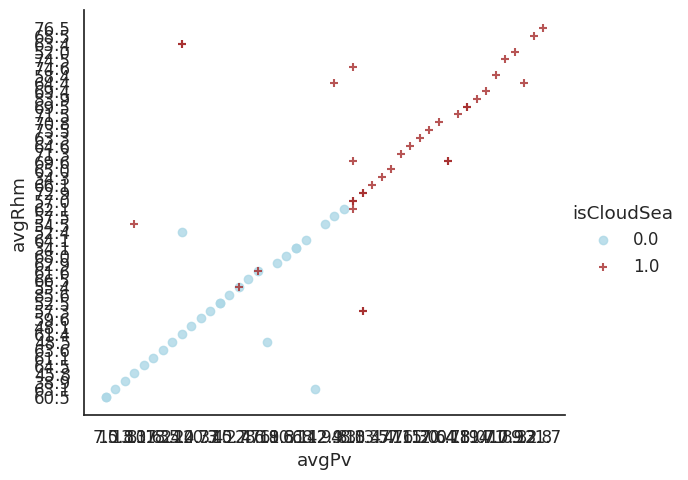

In [ ]:
some_of_No = pd.concat([ seoul_weather_data2.loc[seoul_weather_data2.isCloudSea == 0.0, :].sample(n=30),  
                         seoul_weather_data2.loc[seoul_weather_data2.isCloudSea == 1.0, :] ], axis=0 )

sns.set(style='white', font_scale=1.1)
def_palette = {0.0:'lightblue', 1.0:'brown'}

sns.lmplot(x= 'avgPv', y= 'avgRhm', data = some_of_No, hue='isCloudSea', fit_reg = False, 
          markers=['o', '+'], height = 5, aspect=1.2, palette = def_palette) 



# 4.3 Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = seoul_weather_data2.drop(['isCloudSea', 'tm'], axis=1).values
y = seoul_weather_data2.isCloudSea.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 로지스틱 회귀 모델 생성
clf = LogisticRegression(solver='liblinear')

# 모델 학습
clf.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = clf.predict(X_test)

# 예측 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7209302325581395


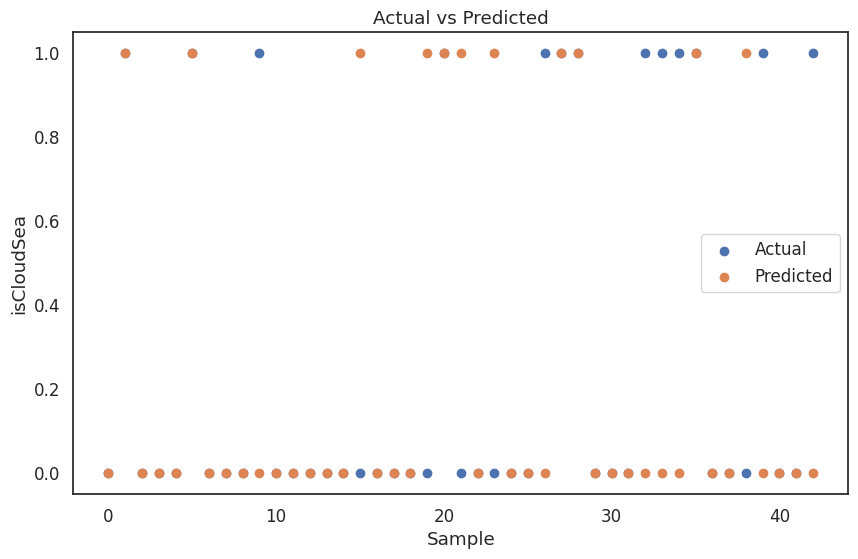

In [ ]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('isCloudSea')
plt.title('Actual vs Predicted')
plt.legend()

# 그래프 출력
plt.show()

<Figure size 1000x600 with 0 Axes>

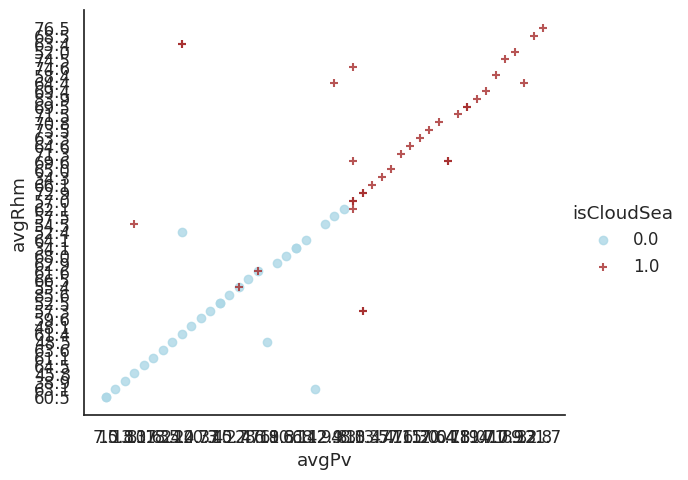

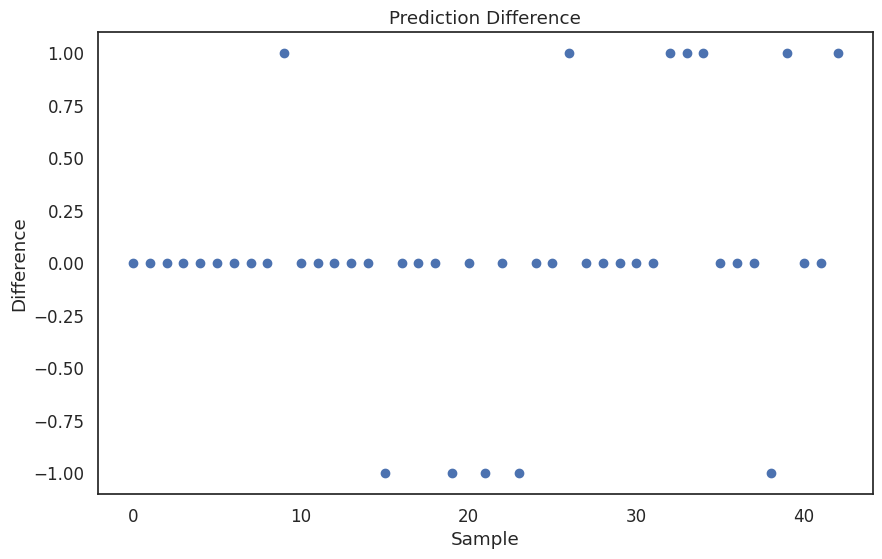

In [ ]:
# 그래프 설정
plt.figure(figsize=(10, 6))

# avgPv와 avgRhm에 따른 isCloudSea 값의 그래프
sns.set(style='white', font_scale=1.1)
def_palette = {0.0:'lightblue', 1.0:'brown'}
sns.lmplot(x='avgPv', y='avgRhm', data=some_of_No, hue='isCloudSea', fit_reg=False, 
           markers=['o', '+'], height=5, aspect=1.2, palette=def_palette)

# 예측값과 실측값의 차이를 나타내는 그래프
y_pred = clf.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test - y_pred)
plt.xlabel('Sample')
plt.ylabel('Difference')
plt.title('Prediction Difference')

# 그래프 출력
plt.show()